In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-9iy3a7q7
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-9iy3a7q7
     |████████████████████████████████| 634kB 1.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=24ce4941b8b3e9b9fe29b3f2af89effb8f1b99a9801a901faafb459f7bb8ad9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-wrc43omw/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=dc6d95b87a70f6e15028392bf0e4c7577bd07455c90cdef2f8968722495e31dd
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [3]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" git+https://github.com/NVIDIA/apex

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-ptvn0pmr
Created temporary directory: /tmp/pip-req-tracker-i7fhg0tn
Created requirements tracker '/tmp/pip-req-tracker-i7fhg0tn'
Created temporary directory: /tmp/pip-install-zzcm__hd
  Created temporary directory: /tmp/pip-req-build-sgmtg01j
  Cloning https://github.com/NVIDIA/apex to /tmp/pip-req-build-sgmtg01j
  Running command git clone -q https://github.com/NVIDIA/apex /tmp/pip-req-build-sgmtg01j
  Running command git submodule update --init --recursive -q
  Added git+https://github.com/NVIDIA/apex to build tracker '/tmp/pip-req-tracker-i7fhg0tn'
    Running setup.py (path:/tmp/pip-req-build-sgmtg01j/setup.py) egg_info for package from git+https://github.com/NVIDIA/apex
    Running comman

In [4]:
cd /content/drive/My Drive/Backup/EVP/S10

/content/drive/My Drive/Backup/EVP/S10


In [0]:
from __future__ import print_function
import torch
# from torch.optim.lr_scheduler import OneCycleLR
# import numpy as np
# import matplotlib.pyplot as plt

# Setting Seed for Reproducibility

In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


# Data Loader


In [0]:
import torchvision
from torchvision import datasets, transforms
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Normalize, Cutout, Rotate

)
from vision.train.data_loader import TrainsetLoader
# from albumentations.pytorch import ToTensor


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Visualise Data

In [0]:
albumentations_pil_transform_train = [
    HorizontalFlip(),
    Cutout(),
    Rotate((-9.0, 9.0))
]

In [0]:
mean = (0.5, 0.5, 0.5)
std = (0.5, 0.5, 0.5)
trainset_config_list = {
    'dataset' : datasets.CIFAR10,
    'mean' : mean,
    'std' : std,
    'trainset_transforms' : albumentations_pil_transform_train,
    'batch_size' : 64,
    'num_workers': 4,
    'use_cuda' : torch.cuda.is_available()

}

In [11]:
trainloader_obj = TrainsetLoader(trainset_config_list)
train_loader, test_loader = trainloader_obj()

Files already downloaded and verified
Files already downloaded and verified


plane   dog  deer  deer


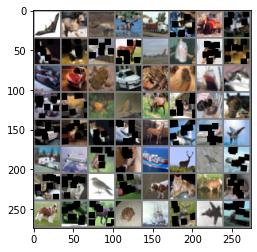

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Model Summary


In [0]:
from vision.models.resnet import ResNet18
import torch.nn as nn
import torch.optim as optim

try:
  from torchsummary import summary
except:
  !pip install torchsummary
  from torchsummary import summary

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

#LR Finder

In [0]:
from vision.train.utils.lr_finder import LRFinder

In [0]:
learning_rate = 1e-5
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



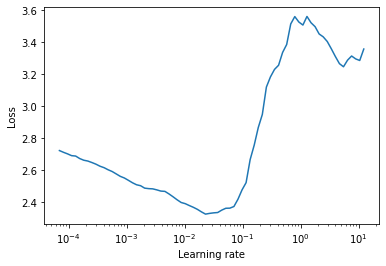

In [17]:
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [18]:
[_ for _ in zip(lr_finder.history['loss'], lr_finder.history['lr'])]
(min(lr_finder.history['loss']))

2.322622926229071

In [19]:
min_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(min(lr_finder.history['loss']))]
min_lr


0.022908676527677727

# Train and Evaluate Model

In [20]:
from vision.train.train_evaluate import Train
from torch.optim.lr_scheduler import ReduceLROnPlateau


CUDA Available? True


## Initialising and setting hyper-parameters


In [0]:
EPOCHS = 50
learning_rate = min_lr
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
# scheduler =None
scheduler = ReduceLROnPlateau(optimizer, min_lr=1e-4, patience = 4, verbose=True)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)


## Creating Config for Training 

In [0]:
config_list ={
    "device": device,
    "model": model,
    "EPOCHS": EPOCHS,
    "criterion": criterion,
    "optimizer": optimizer,
    "scheduler": scheduler,
    "logger": None,
    "train_loader": train_loader,
    "test_loader" : test_loader,
    "flag_misclassified_images": True
}

## Create obj of Train and run for training


In [23]:
cifar_model_train = Train(config_list)
cifar_model_train.run_model()

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH:1 | LR: 0.022908676527677727


Loss=2.0826728343963623 Batch_id=781 Accuracy=40.67: 100%|██████████| 782/782 [00:37<00:00, 20.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 5352/10000 (53.52%)

EPOCH:2 | LR: 0.022908676527677727


Loss=1.6798973083496094 Batch_id=781 Accuracy=58.49: 100%|██████████| 782/782 [00:37<00:00, 20.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 6474/10000 (64.74%)

EPOCH:3 | LR: 0.022908676527677727


Loss=0.5074613094329834 Batch_id=781 Accuracy=67.34: 100%|██████████| 782/782 [00:37<00:00, 20.93it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 7533/10000 (75.33%)

EPOCH:4 | LR: 0.022908676527677727


Loss=0.9529299139976501 Batch_id=781 Accuracy=71.88: 100%|██████████| 782/782 [00:37<00:00, 20.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 7514/10000 (75.14%)

EPOCH:5 | LR: 0.022908676527677727


Loss=0.7231287360191345 Batch_id=781 Accuracy=75.27: 100%|██████████| 782/782 [00:37<00:00, 20.92it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 7735/10000 (77.35%)

EPOCH:6 | LR: 0.022908676527677727


Loss=1.1850215196609497 Batch_id=781 Accuracy=77.74: 100%|██████████| 782/782 [00:37<00:00, 20.91it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 8112/10000 (81.12%)

EPOCH:7 | LR: 0.022908676527677727


Loss=0.8584098815917969 Batch_id=781 Accuracy=79.34: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 8066/10000 (80.66%)

EPOCH:8 | LR: 0.022908676527677727


Loss=0.3899223208427429 Batch_id=781 Accuracy=80.71: 100%|██████████| 782/782 [00:37<00:00, 21.05it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 8337/10000 (83.37%)

EPOCH:9 | LR: 0.022908676527677727


Loss=0.4872395098209381 Batch_id=781 Accuracy=82.11: 100%|██████████| 782/782 [00:37<00:00, 21.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 8335/10000 (83.35%)

EPOCH:10 | LR: 0.022908676527677727


Loss=0.7855402231216431 Batch_id=781 Accuracy=83.17: 100%|██████████| 782/782 [00:37<00:00, 21.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 8532/10000 (85.32%)

EPOCH:11 | LR: 0.022908676527677727


Loss=0.2323262095451355 Batch_id=781 Accuracy=84.28: 100%|██████████| 782/782 [00:36<00:00, 21.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 8516/10000 (85.16%)

EPOCH:12 | LR: 0.022908676527677727


Loss=0.3354554772377014 Batch_id=781 Accuracy=85.13: 100%|██████████| 782/782 [00:37<00:00, 20.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8684/10000 (86.84%)

EPOCH:13 | LR: 0.022908676527677727


Loss=0.8152070045471191 Batch_id=781 Accuracy=85.98: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8570/10000 (85.70%)

EPOCH:14 | LR: 0.022908676527677727


Loss=0.3233632743358612 Batch_id=781 Accuracy=86.78: 100%|██████████| 782/782 [00:36<00:00, 21.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8626/10000 (86.26%)

EPOCH:15 | LR: 0.022908676527677727


Loss=0.6727626323699951 Batch_id=781 Accuracy=87.50: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8719/10000 (87.19%)

EPOCH:16 | LR: 0.022908676527677727


Loss=0.2977197766304016 Batch_id=781 Accuracy=87.94: 100%|██████████| 782/782 [00:36<00:00, 21.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8675/10000 (86.75%)

EPOCH:17 | LR: 0.022908676527677727


Loss=0.09374436736106873 Batch_id=781 Accuracy=88.75: 100%|██████████| 782/782 [00:36<00:00, 21.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8775/10000 (87.75%)

EPOCH:18 | LR: 0.022908676527677727


Loss=0.4861196279525757 Batch_id=781 Accuracy=89.17: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8823/10000 (88.23%)

EPOCH:19 | LR: 0.022908676527677727


Loss=0.24860580265522003 Batch_id=781 Accuracy=89.65: 100%|██████████| 782/782 [00:37<00:00, 21.09it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8848/10000 (88.48%)

EPOCH:20 | LR: 0.022908676527677727


Loss=0.4826849102973938 Batch_id=781 Accuracy=90.18: 100%|██████████| 782/782 [00:36<00:00, 21.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8850/10000 (88.50%)

EPOCH:21 | LR: 0.022908676527677727


Loss=0.5620717406272888 Batch_id=781 Accuracy=90.59: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8893/10000 (88.93%)

EPOCH:22 | LR: 0.022908676527677727


Loss=0.30951210856437683 Batch_id=781 Accuracy=90.78: 100%|██████████| 782/782 [00:36<00:00, 21.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8859/10000 (88.59%)

EPOCH:23 | LR: 0.022908676527677727


Loss=0.5046570897102356 Batch_id=781 Accuracy=91.36: 100%|██████████| 782/782 [00:36<00:00, 21.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8926/10000 (89.26%)

EPOCH:24 | LR: 0.022908676527677727


Loss=0.4078260362148285 Batch_id=781 Accuracy=91.66: 100%|██████████| 782/782 [00:36<00:00, 21.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8918/10000 (89.18%)

EPOCH:25 | LR: 0.022908676527677727


Loss=0.5394659638404846 Batch_id=781 Accuracy=91.99: 100%|██████████| 782/782 [00:36<00:00, 21.17it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 8965/10000 (89.65%)

EPOCH:26 | LR: 0.022908676527677727


Loss=0.8356308937072754 Batch_id=781 Accuracy=92.22: 100%|██████████| 782/782 [00:36<00:00, 21.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8982/10000 (89.82%)

EPOCH:27 | LR: 0.022908676527677727


Loss=0.10350608825683594 Batch_id=781 Accuracy=92.62: 100%|██████████| 782/782 [00:37<00:00, 21.12it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8906/10000 (89.06%)

EPOCH:28 | LR: 0.022908676527677727


Loss=0.08336997032165527 Batch_id=781 Accuracy=92.77: 100%|██████████| 782/782 [00:36<00:00, 21.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8941/10000 (89.41%)

EPOCH:29 | LR: 0.022908676527677727


Loss=0.6014174818992615 Batch_id=781 Accuracy=93.24: 100%|██████████| 782/782 [00:36<00:00, 21.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8933/10000 (89.33%)

EPOCH:30 | LR: 0.022908676527677727


Loss=0.09062978625297546 Batch_id=781 Accuracy=93.22: 100%|██████████| 782/782 [00:36<00:00, 21.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Epoch    30: reducing learning rate of group 0 to 2.2909e-03.

Test set: Average loss: 0.0059, Accuracy: 8941/10000 (89.41%)

EPOCH:31 | LR: 0.002290867652767773


Loss=0.035924941301345825 Batch_id=781 Accuracy=95.15: 100%|██████████| 782/782 [00:36<00:00, 21.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 9106/10000 (91.06%)

EPOCH:32 | LR: 0.002290867652767773


Loss=0.1640670895576477 Batch_id=781 Accuracy=95.66: 100%|██████████| 782/782 [00:36<00:00, 21.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9114/10000 (91.14%)

EPOCH:33 | LR: 0.002290867652767773


Loss=0.11328262090682983 Batch_id=781 Accuracy=96.00: 100%|██████████| 782/782 [00:36<00:00, 21.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 9111/10000 (91.11%)

EPOCH:34 | LR: 0.002290867652767773


Loss=0.0482197105884552 Batch_id=781 Accuracy=96.16: 100%|██████████| 782/782 [00:36<00:00, 21.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9122/10000 (91.22%)

EPOCH:35 | LR: 0.002290867652767773


Loss=0.005793571472167969 Batch_id=781 Accuracy=96.16: 100%|██████████| 782/782 [00:37<00:00, 21.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 9117/10000 (91.17%)

EPOCH:36 | LR: 0.002290867652767773


Loss=0.28072527050971985 Batch_id=781 Accuracy=96.32: 100%|██████████| 782/782 [00:37<00:00, 21.06it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Epoch    36: reducing learning rate of group 0 to 2.2909e-04.

Test set: Average loss: 0.0053, Accuracy: 9136/10000 (91.36%)

EPOCH:37 | LR: 0.0002290867652767773


Loss=0.029839783906936646 Batch_id=781 Accuracy=96.45: 100%|██████████| 782/782 [00:37<00:00, 20.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9148/10000 (91.48%)

EPOCH:38 | LR: 0.0002290867652767773


Loss=0.7448521852493286 Batch_id=781 Accuracy=96.39: 100%|██████████| 782/782 [00:37<00:00, 20.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9128/10000 (91.28%)

EPOCH:39 | LR: 0.0002290867652767773


Loss=0.04281100630760193 Batch_id=781 Accuracy=96.51: 100%|██████████| 782/782 [00:37<00:00, 21.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9150/10000 (91.50%)

EPOCH:40 | LR: 0.0002290867652767773


Loss=0.19737952947616577 Batch_id=781 Accuracy=96.52: 100%|██████████| 782/782 [00:36<00:00, 21.19it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 9143/10000 (91.43%)

EPOCH:41 | LR: 0.0002290867652767773


Loss=0.009212791919708252 Batch_id=781 Accuracy=96.53: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]

Epoch    41: reducing learning rate of group 0 to 1.0000e-04.

Test set: Average loss: 0.0052, Accuracy: 9154/10000 (91.54%)

EPOCH:42 | LR: 0.0001


Loss=0.021600306034088135 Batch_id=781 Accuracy=96.66: 100%|██████████| 782/782 [00:36<00:00, 21.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9150/10000 (91.50%)

EPOCH:43 | LR: 0.0001


Loss=0.30072319507598877 Batch_id=781 Accuracy=96.62: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 9141/10000 (91.41%)

EPOCH:44 | LR: 0.0001


Loss=0.03155699372291565 Batch_id=781 Accuracy=96.65: 100%|██████████| 782/782 [00:36<00:00, 21.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9142/10000 (91.42%)

EPOCH:45 | LR: 0.0001


Loss=0.24165022373199463 Batch_id=781 Accuracy=96.58: 100%|██████████| 782/782 [00:36<00:00, 21.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9139/10000 (91.39%)

EPOCH:46 | LR: 0.0001


Loss=0.00514337420463562 Batch_id=781 Accuracy=96.68: 100%|██████████| 782/782 [00:41<00:00, 19.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9161/10000 (91.61%)

EPOCH:47 | LR: 0.0001


Loss=0.0005754232406616211 Batch_id=781 Accuracy=96.71: 100%|██████████| 782/782 [00:37<00:00, 20.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9162/10000 (91.62%)

EPOCH:48 | LR: 0.0001


Loss=0.3669161796569824 Batch_id=781 Accuracy=96.73: 100%|██████████| 782/782 [00:37<00:00, 20.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 9159/10000 (91.59%)

EPOCH:49 | LR: 0.0001


Loss=0.5193064212799072 Batch_id=781 Accuracy=96.58: 100%|██████████| 782/782 [00:37<00:00, 20.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 9152/10000 (91.52%)

EPOCH:50 | LR: 0.0001


Loss=0.10528433322906494 Batch_id=781 Accuracy=96.66: 100%|██████████| 782/782 [00:37<00:00, 20.71it/s]



Test set: Average loss: 0.0054, Accuracy: 9151/10000 (91.51%)



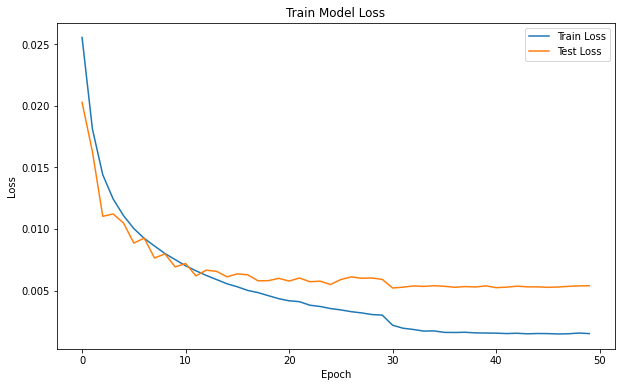

In [24]:
cifar_model_train.plot_loss_graph()

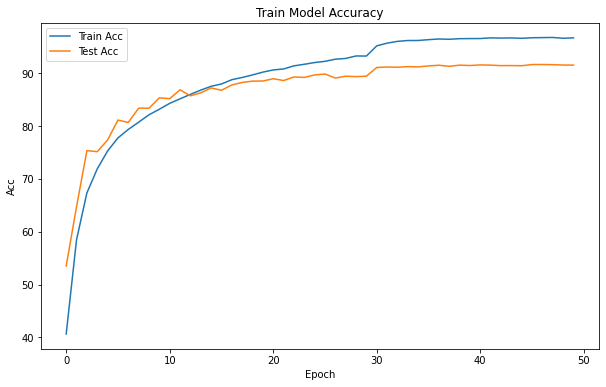

In [25]:
cifar_model_train.plot_acc_graph()

#GradCam

In [0]:
visualize_config_list = {
    'device':device,
    'mean': mean,
    'std': std,
    'resize_shape': (32,32),
    'model': cifar_model_train.model,
    'test_loader' : test_loader
}

In [0]:
from importlib import reload
from vision.train.utils.visualize import Visualization

In [0]:
# reload(vision.train.utils.visualize)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


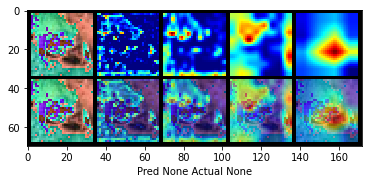

In [29]:
visual_obj = Visualization(visualize_config_list)
visual_obj.heatmap_activations_test_loader(5)
# visual_obj.heatmap_activations(6)
# visual_obj.heatmap_activations(7)

# Misclassified Images

In [0]:
misclassified  = cifar_model_train.misclassified_images_list[:25]
# misclassified


In [0]:
from vision.train.utils.visualize import UnNormalize

In [0]:
  normalized = UnNormalize(0.5,
                          0.5)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/content/drive/My Drive/Backup/EVP/S10/vision/train/utils/visualize.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(6,6))


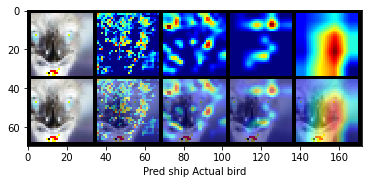

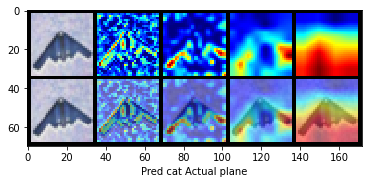

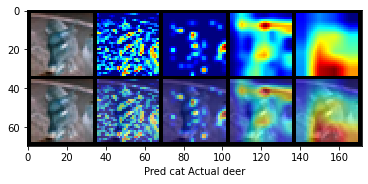

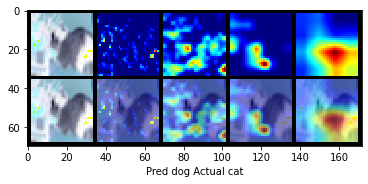

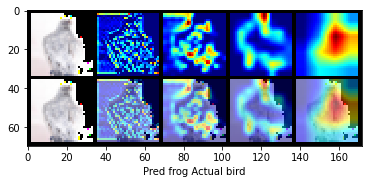

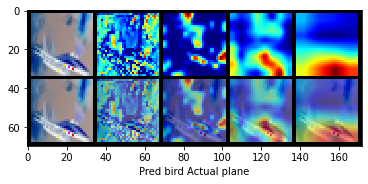

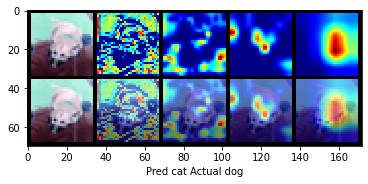

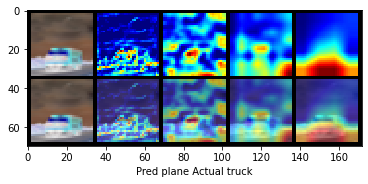

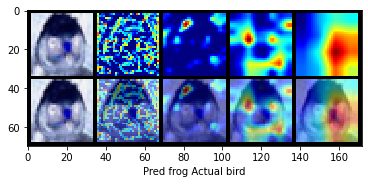

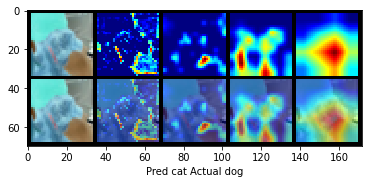

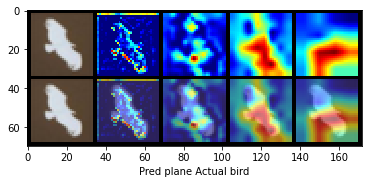

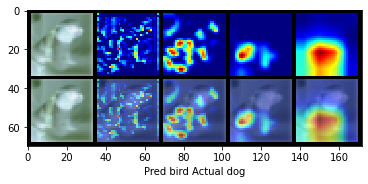

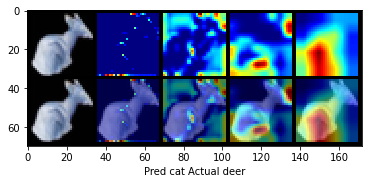

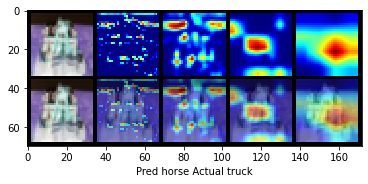

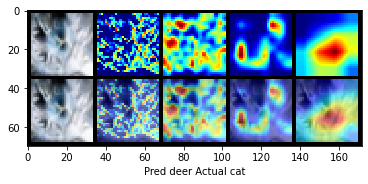

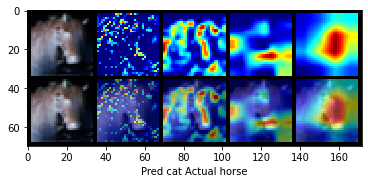

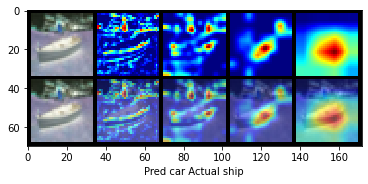

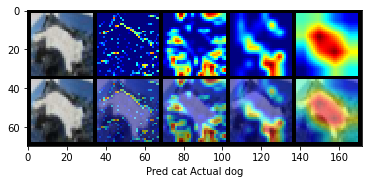

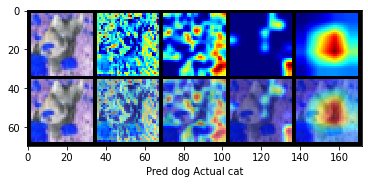

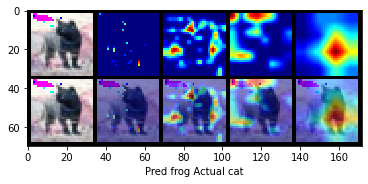

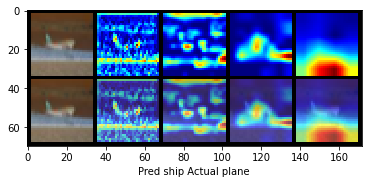

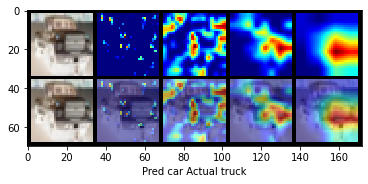

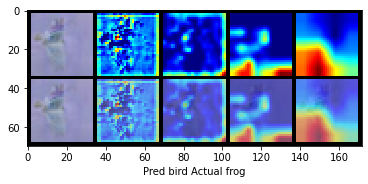

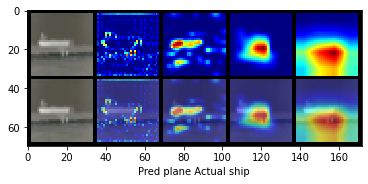

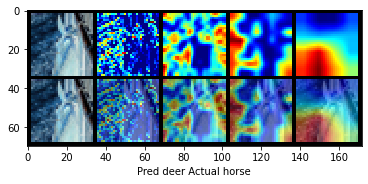

In [33]:

for i in range(25):
  img  = normalized(misclassified[i]["image"])
  visual_obj.heatmap_activations(img, classes[misclassified[i]["actual_label"].item()], classes[misclassified[i]["predicted_label"].item()])